# OPENDAP GFS

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/asascience-open/xarray-subset-grid/blob/main/docs/examples/gfs_opendap.ipynb)

In [ ]:
# Install required libraries
# !pip install -q xarray_subset_grid@git+https://github.com/asascience-open/xarray-subset-grid.git
# !pip install -q s3fs cftime xarray cf-xarray fsspec dask h5netcdf

In [1]:
import cf_xarray  # noqa
import datetime
import numpy as np
import xarray as xr

import xarray_subset_grid as xsg


current_date = datetime.datetime.now().strftime("%Y%m%d")

ds = xr.open_dataset(
    f"https://nomads.ncep.noaa.gov/dods/gfs_0p25_1hr/gfs{current_date}/gfs_0p25_1hr_00z", chunks={}
)
ds

/Users/matthew.iannucci/Developer/xarray-subset-grid/venv/lib/python3.10/site-packages/xarray/coding/times.py:170: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset> Size: 430GB
Dimensions:         (time: 121, lev: 41, lat: 721, lon: 1440)
Coordinates:
  * time            (time) datetime64[ns] 968B 2024-07-24 ... 2024-07-29
  * lev             (lev) float64 328B 1e+03 975.0 950.0 ... 0.04 0.02 0.01
  * lat             (lat) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * lon             (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables: (12/215)
    absvprs         (time, lev, lat, lon) float32 21GB dask.array<chunksize=(121, 41, 721, 1440), meta=np.ndarray>
    no4lftxsfc      (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    acpcpsfc        (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    albdosfc        (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    apcpsfc         (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    capesfc         (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    ...              ...
    vwshneg2pv      (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    vwshtrop        (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    watrsfc         (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    weasdsfc        (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    wiltsfc         (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
    var00212m       (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
Attributes:
    title:        GFS 0.25 deg starting from 00Z24jul2024, downloaded Jul 24 ...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Wed Jul 24 06:06:21 UTC 2024 : imported by GrADS Data Serve...

See the size of the dataset

In [12]:
f"Dataset size: {ds.nbytes * 1.0e-9} Gb"

'Dataset size: 429.64449538400004 Gb'

Make sure the grid is recognized

In [2]:
ds.xsg.grid.name

'regular_grid'

Grab out only the composite reflectivity

In [3]:
ds_refd = ds.xsg.subset_vars(['refcclm'])
ds_refd

<xarray.Dataset> Size: 503MB
Dimensions:  (lat: 721, lon: 1440, time: 121)
Coordinates:
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time     (time) datetime64[ns] 968B 2024-07-24 ... 2024-07-29
Data variables:
    refcclm  (time, lat, lon) float32 503MB dask.array<chunksize=(121, 721, 1440), meta=np.ndarray>
Attributes:
    title:        GFS 0.25 deg starting from 00Z24jul2024, downloaded Jul 24 ...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Wed Jul 24 06:06:21 UTC 2024 : imported by GrADS Data Serve...

Create our region of interest and subset

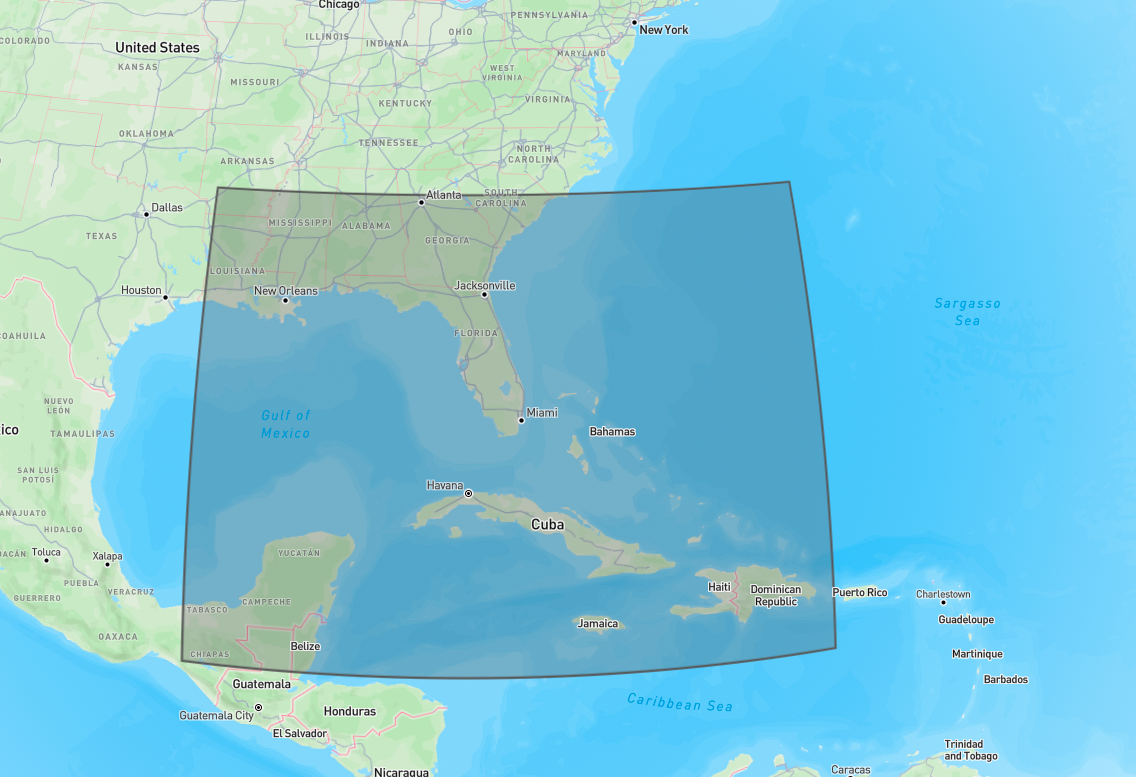

In [4]:
bbox = [-93.63283364104035, 16.18222316056857, -67.60864242620244, 34.02542167172069]

ds_refd_subset = ds_refd.xsg.subset_bbox(bbox)
ds_refd_subset

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 72, lon: 104, time: 121)
Coordinates:
  * lat      (lat) float64 576B 16.25 16.5 16.75 17.0 ... 33.25 33.5 33.75 34.0
  * lon      (lon) float64 832B 266.5 266.8 267.0 267.2 ... 291.8 292.0 292.2
  * time     (time) datetime64[ns] 968B 2024-07-24 ... 2024-07-29
Data variables:
    refcclm  (time, lat, lon) float32 4MB dask.array<chunksize=(121, 72, 104), meta=np.ndarray>
Attributes:
    title:        GFS 0.25 deg starting from 00Z24jul2024, downloaded Jul 24 ...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Wed Jul 24 06:06:21 UTC 2024 : imported by GrADS Data Serve...

Plot the first timestep

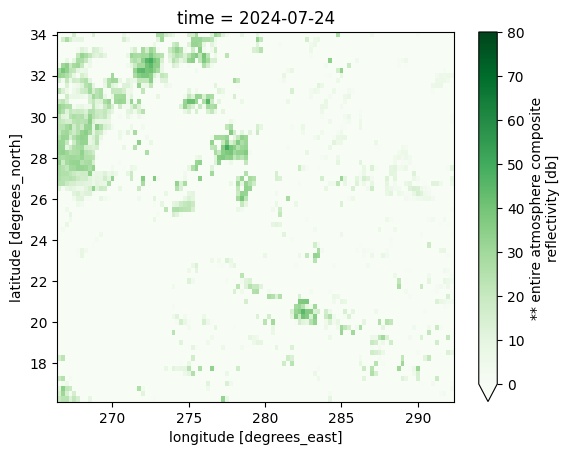

In [9]:
ds_refd_subset.cf.isel(time=0).refcclm.plot(vmin=0, vmax=80, cmap="Greens")

In [13]:
f"Subset dataset size: {ds_refd_subset.nbytes * 1.0e-6} Mb"

'Subset dataset size: 3.626568 Mb'